In [21]:
import json
import matplotlib.pyplot as plt
import numpy as np
from params import COSTO_INVENTARIO, PLANTAS

In [22]:
nombre_archivo = "planta0.json"
with open(nombre_archivo, "r") as file:
    costos = json.load(file)

nombre_archivo = "planta0lluvia.json"
with open(nombre_archivo, "r") as file:
    lluvia = json.load(file)

In [23]:
costo_transporte = [value["costo_transporte"] for value in costos.values()]
costo_inventario = [value["costo_inventario"] for value in costos.values()]
costo_quiebre_stock = [value["costo_quiebre_stock"] for value in costos.values()]

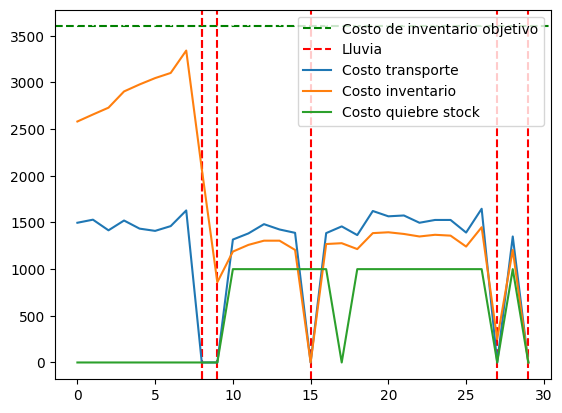

In [26]:
#mostrar grafico de costos por dia de transporte, inventario y quiebre de stock

CI = COSTO_INVENTARIO
demanda_promedio = PLANTAS[0][3][0]

plt.axhline(y=CI*3*demanda_promedio, color="green", linestyle="--", label="Costo de inventario objetivo")

lluvias = 0
for i in range(0, len(lluvia)):
    if lluvia[str(i)]:
        if lluvias==0:
            plt.axvline(x=i, color="red", linestyle="--", label="Lluvia")
            lluvias+=1
        plt.axvline(x=i, color="red", linestyle="--")
    else:
        plt.axvline(x=i, color="white", linestyle="--")
        
plt.plot(costo_transporte, label="Costo transporte")
plt.plot(costo_inventario, label="Costo inventario")
plt.plot(costo_quiebre_stock, label="Costo quiebre stock")
plt.legend()
plt.show()